# EDA - Titanic

In [1]:
import pandas as pd

# Load the CSV file to inspect its contents
file_path = '../titanic.csv'
titanic_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure and contents
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


ChatGPT:
PassengerId: A unique identifier for each passenger.
Survived: Indicates whether the passenger survived (1) or did not survive (0).
Pclass: The passenger class (1st, 2nd, or 3rd class).
Name: The name of the passenger.
Sex: The gender of the passenger.
Age: The age of the passenger.
SibSp: The number of siblings or spouses aboard.
Parch: The number of parents or children aboard.
Ticket: The ticket number.
Fare: The fare paid for the ticket.
Cabin: Cabin number (if available).
Embarked: The port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
This data is often used for analysis, such as understanding the demographics of the passengers, their survival rates, and the factors that might have influenced their chances of survival. If you have specific aspects of this dataset you would like to explore or summarize, please let me know!

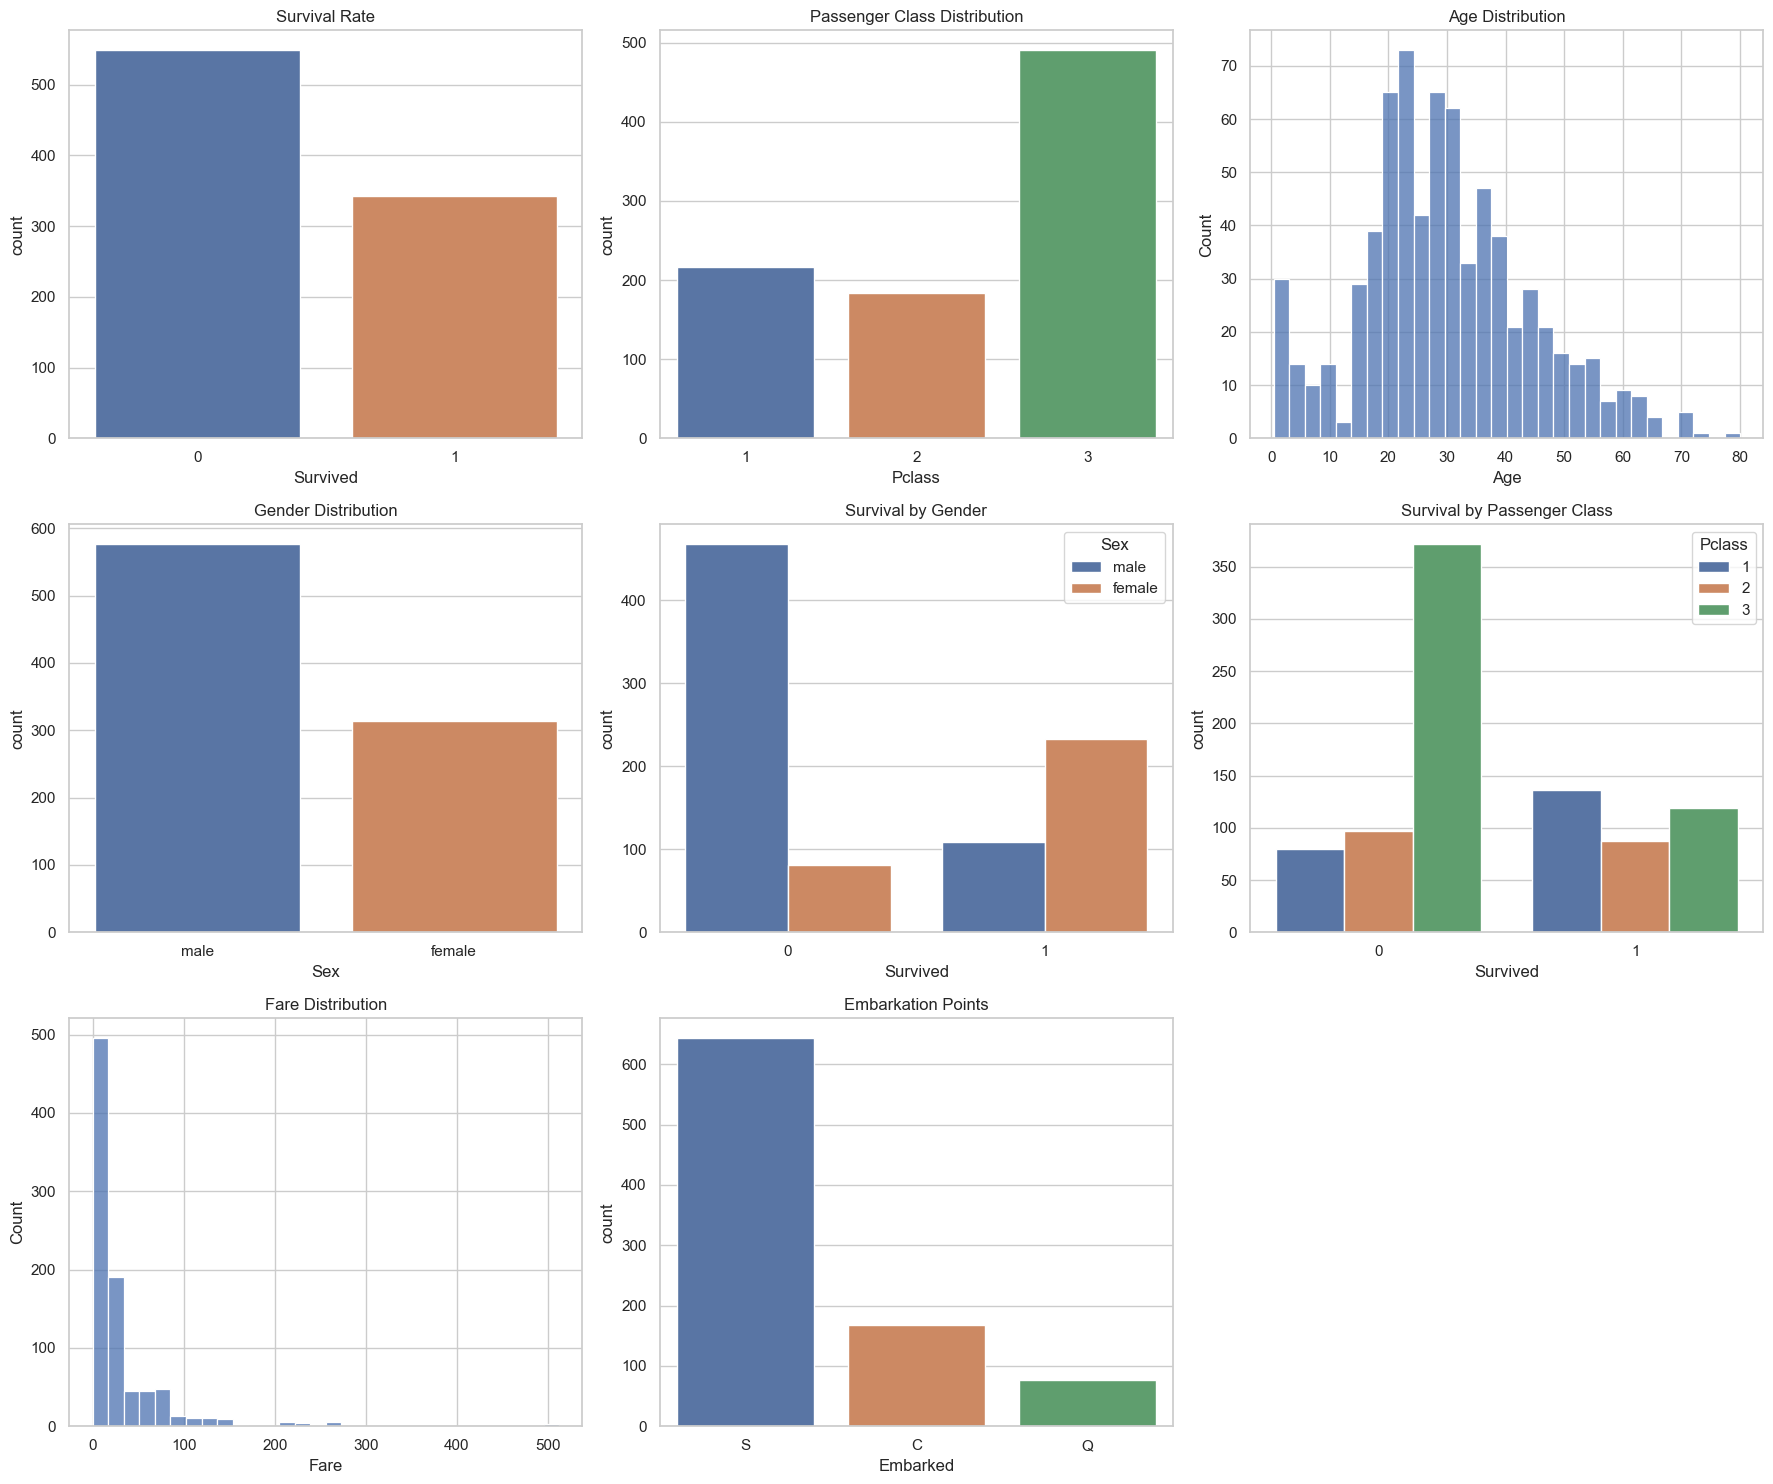

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Plot 1: Survival Rate
sns.countplot(x='Survived', data=titanic_data, ax=axes[0, 0])
axes[0, 0].set_title('Survival Rate')

# Plot 2: Passenger Class Distribution
sns.countplot(x='Pclass', data=titanic_data, ax=axes[0, 1])
axes[0, 1].set_title('Passenger Class Distribution')

# Plot 3: Age Distribution
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=False, ax=axes[0, 2])
axes[0, 2].set_title('Age Distribution')

# Plot 4: Gender Distribution
sns.countplot(x='Sex', data=titanic_data, ax=axes[1, 0])
axes[1, 0].set_title('Gender Distribution')

# Plot 5: Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data, ax=axes[1, 1])
axes[1, 1].set_title('Survival by Gender')

# Plot 6: Survival by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data, ax=axes[1, 2])
axes[1, 2].set_title('Survival by Passenger Class')

# Plot 7: Fare Distribution
sns.histplot(titanic_data['Fare'].dropna(), bins=30, kde=False, ax=axes[2, 0])
axes[2, 0].set_title('Fare Distribution')

# Plot 8: Embarkation Points
sns.countplot(x='Embarked', data=titanic_data, ax=axes[2, 1])
axes[2, 1].set_title('Embarkation Points')

# Adjusting layout
plt.tight_layout()

# Hiding the empty subplot
axes[2, 2].set_visible(False)

# Displaying the plots
plt.show()


ChatGPT:
Survival Rate: This plot shows the number of passengers who survived compared to those who did not.
Passenger Class Distribution: This illustrates the distribution of passengers across different classes (1st, 2nd, and 3rd).
Age Distribution: A histogram representing the age distribution of the passengers.
Gender Distribution: A comparison of the number of male and female passengers.
Survival by Gender: This plot breaks down the survival rates by gender, providing insights into how survival may have varied between males and females.
Survival by Passenger Class: This illustrates the survival rates across different passenger classes, indicating how class might have influenced survival chances.
Fare Distribution: A histogram showing the distribution of fares paid by passengers.
Embarkation Points: The distribution of passengers based on their points of embarkation (Cherbourg, Queenstown, Southampton).

ChatGPT:

Correlation Matrix
The correlation matrix indicates some correlations between features and survival. However, since many important features like gender and embarkation point are categorical, they do not appear in this correlation matrix.
Detailed Analyses
Survival by Gender:

Females: 74.20% survival rate.
Males: 18.89% survival rate.
This significant difference highlights that gender was a crucial factor in survival chances.
Survival by Passenger Class:

1st Class: 62.96% survival rate.
2nd Class: 47.28% survival rate.
3rd Class: 24.24% survival rate.
Higher class passengers had better survival rates, indicating a strong class bias in survival.
Survival by Age:

Children (0-12 years): 57.97% survival rate.
Teenagers (12-18 years): 42.86% survival rate.
Young Adults (18-30 years): 35.56% survival rate.
Adults (30-50 years): 42.32% survival rate.
Older Adults (50-80 years): 34.38% survival rate.
Younger passengers, especially children, had higher survival rates.
Survival by Fare:

The survival rate increases with the fare bracket, suggesting passengers who paid higher fares had better survival chances.
Survival by Siblings/Spouses Aboard (SibSp):

Passengers with one sibling/spouse aboard had the highest survival rate (53.59%).
No siblings/spouses: 34.54% survival rate.
This indicates that having a sibling or spouse aboard could influence survival chances.
Survival by Parents/Children Aboard (Parch):

Passengers with one parent/child aboard had the highest survival rate (55.08%).
No parents/children: 34.37% survival rate.
Similar to SibSp, having family aboard impacted survival rates.
These findings suggest that survival on the Titanic was influenced by multiple factors, including gender, passenger class, age, fare, and the presence of family members. The high survival rates among women and children, as well as first-class passengers, reflect the "women and children first" protocol and the socio-economic disparities of the era

In [ ]:
#TODO fix the code

# Creating a correlation matrix for numerical features
correlation_matrix = titanic_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preparing data for more detailed analyses
# Survival Rate by Gender
survival_gender = titanic_data.groupby('Sex')['Survived'].mean()

# Survival Rate by Passenger Class
survival_pclass = titanic_data.groupby('Pclass')['Survived'].mean()

# Preparing data for age and fare analysis
# Binning ages for better visualization
age_bins = pd.cut(titanic_data['Age'], bins=[0, 12, 18, 30, 50, 80])
survival_age = titanic_data.groupby(age_bins)['Survived'].mean()

# Binning fares for better visualization
fare_bins = pd.qcut(titanic_data['Fare'], 4)
survival_fare = titanic_data.groupby(fare_bins)['Survived'].mean()

# Siblings/Spouses and Parents/Children analysis
survival_sibsp = titanic_data.groupby('SibSp')['Survived'].mean()
survival_parch = titanic_data.groupby('Parch')['Survived'].mean()

survival_gender, survival_pclass, survival_age, survival_fare, survival_sibsp, survival_parch
